In [361]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [362]:
from logic import PROBLEME_1, PROBLEME_2, ProblemeLogic_simple, _InstanceArr, _1D_bools
from models import (
    DenseModelsGeneric, train_model, eval_model, Results, 
    SimpleLogicDataset, DataLoader, )

In [363]:
device = torch.device("cpu")

In [364]:
probleme = PROBLEME_2
N = 35
model = DenseModelsGeneric(
    layers=[(probleme.nbInputs, N, "relu"), 
            *([(N, N, "relu")] * 5),
            (N, 1, "sigmoid")], 
    optim=torch.optim.Adam, lr=0.001,
    criterion=torch.nn.HuberLoss())
print(model)

DenseModelsGeneric(
  (_layers): Sequential(
    (0): Linear(in_features=5, out_features=35, bias=True)
    (1): ReLU()
    (2): Linear(in_features=35, out_features=35, bias=True)
    (3): ReLU()
    (4): Linear(in_features=35, out_features=35, bias=True)
    (5): ReLU()
    (6): Linear(in_features=35, out_features=35, bias=True)
    (7): ReLU()
    (8): Linear(in_features=35, out_features=35, bias=True)
    (9): ReLU()
    (10): Linear(in_features=35, out_features=35, bias=True)
    (11): ReLU()
    (12): Linear(in_features=35, out_features=1, bias=True)
    (13): Sigmoid()
  )
  (loss): HuberLoss()
)


In [365]:
dataset = SimpleLogicDataset.genAllFromProblem(probleme)

In [366]:
print(f"{len(dataset)=}")
nbTrue=0
for i in range(len(dataset)):
    _=dataset[i]
    #print(_)
    nbTrue+=_[1]
print(f"{nbTrue=} -> {nbTrue/len(dataset):%}")

len(dataset)=32
nbTrue=11 -> 34.375000%


In [367]:
trainLoader, valLoader = dataset.getLoaders(
    trainProp=0.8, trainBatchSize=16, valBatchSize=32)
print(len(trainLoader), len(trainLoader.dataset), # type: ignore
      len(valLoader), len(valLoader.dataset)) # type: ignore

2 25 1 7


In [368]:
histo: list[tuple[Results, Results]] = []

In [369]:
res = train_model(
    model, model.optim, model.loss, nbEpoches=120, device=device, 
    train_dataloader=trainLoader, test_dataloader=valLoader, history=histo)

Epoch 1, train: (loss: 0.125, accuracy: 40.00%), test: (loss: 0.1244, accuracy: 71.43%)
Epoch 2, train: (loss: 0.1248, accuracy: 64.00%), test: (loss: 0.1239, accuracy: 71.43%)
Epoch 3, train: (loss: 0.1242, accuracy: 64.00%), test: (loss: 0.1234, accuracy: 71.43%)
Epoch 4, train: (loss: 0.1236, accuracy: 64.00%), test: (loss: 0.123, accuracy: 71.43%)
Epoch 5, train: (loss: 0.1238, accuracy: 64.00%), test: (loss: 0.1224, accuracy: 71.43%)
Epoch 6, train: (loss: 0.1236, accuracy: 64.00%), test: (loss: 0.1219, accuracy: 71.43%)
Epoch 7, train: (loss: 0.1221, accuracy: 64.00%), test: (loss: 0.1214, accuracy: 71.43%)
Epoch 8, train: (loss: 0.123, accuracy: 64.00%), test: (loss: 0.121, accuracy: 71.43%)
Epoch 9, train: (loss: 0.1223, accuracy: 64.00%), test: (loss: 0.1205, accuracy: 71.43%)
Epoch 10, train: (loss: 0.1219, accuracy: 64.00%), test: (loss: 0.12, accuracy: 71.43%)
Epoch 11, train: (loss: 0.1223, accuracy: 64.00%), test: (loss: 0.1195, accuracy: 71.43%)
Epoch 12, train: (loss: 0

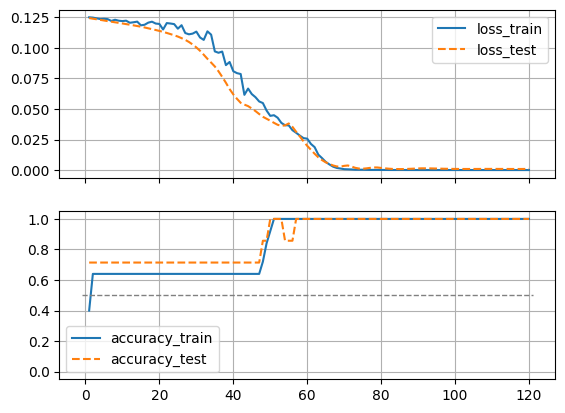

In [370]:
def cell():
    fig, (ax0, ax1) = plt.subplots(ncols=1, nrows=2, sharex=True)
    epoches = list(range(1, 1+len(histo)))
    ax0.plot(epoches, [r.loss for r, _ in histo], label="loss_train")
    ax0.plot(epoches, [r.loss for _, r in histo], "--", label="loss_test")
    ax0.grid(True)
    ax0.legend()
    
    ax1.plot(epoches, [r.accuracy for r, _ in histo], label="accuracy_train")
    ax1.plot(epoches, [r.accuracy for _, r in histo], "--", label="accuracy_test")
    ax1.set_ylim(-0.05, 1.05)
    ax1.hlines(0.5, -1, len(histo)+1, colors="gray", linestyles="--", linewidth=1)
    ax1.grid(True)
    ax1.legend()    
cell(); del cell